### Florian Muthreich   ---   INF368   ---

# Ex0: MNIST in the Cloud

## The Data
The MNIST data was downloaded and imported using the keras library. In total the entire dataset is 70000 images of handwritten numbers from 0 - 10. The data is split into training and test set (60000/10000 split). I further split the training set into 5000 image validation set and 65000 training set. The validation set is used for testing of the Neural Network during training. By withholding a portion of the data from training, I ensure unbiased performance. Only after finetuning performance on the validation set do I run the trained network on the test set.



- your name (ideally at the top of every page)

- a description of your NN architecture

- a description of your training regime, including the training/validation/test split of the data

- a presentation of results, including final accuracy, and a confusion matrix for your test set, and examples of misclassified images

- a complete set of links to source materials used

- a link to the VM and brief description of the structure of your code (files)

- a link to the GitHub repository containing your code and setup

- a discussion of the process, what worked and what didn't, and how you might do things differently in the future

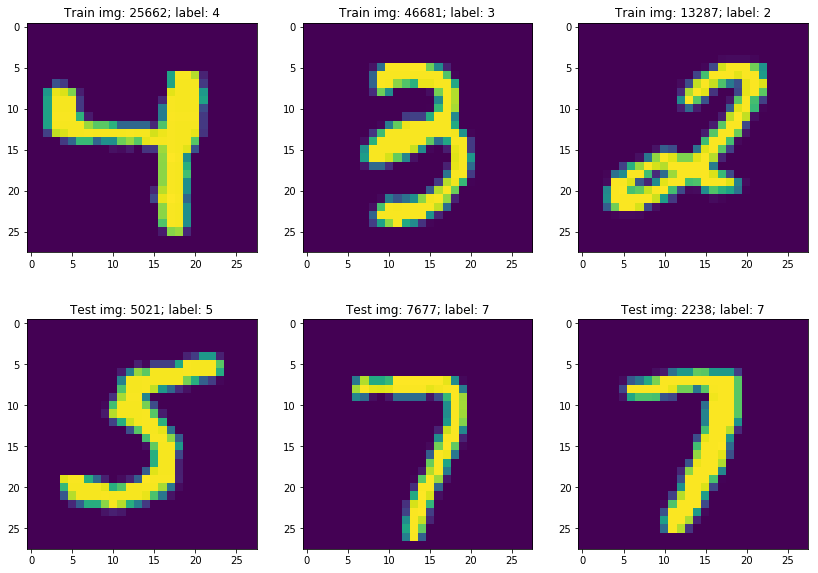

In [30]:
random_MNIST_images()

This figure show six random images from the MNIST dataset. Thee from the train and three from the test set. The Images have the dimensions 28 x 28 pixels. 

---

## The Neural Network Architectures

To build a successful classifier and familiarize myself with Keras and available hyperparameters I chose a simple Neural Network with 1 hidden layer and 50 units. 

In [64]:
model_bs_64.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 50)                39250     
_________________________________________________________________
act_hidden_1 (Activation)    (None, 50)                0         
_________________________________________________________________
out (Dense)                  (None, 10)                510       
_________________________________________________________________
act_out (Activation)         (None, 10)                0         
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


This model has 1 hidden layer with 50 units and a second layer with 10 softmax units. I added another layer before the first hidden layer to convert the picture data from a 28 x 28 matrix into a vector, this is done by the flatten layer. there are no weights learned in this layer, just a transformation from 2 dimensions to 1. The number of parameters can be easily derived from this model description. The activation for the hidden layer in the beginning is the sigmoid function.

We have 784 input features that are connected to 50 hidden units in the first layer (1). Each unit also has a weight for the bias (2). In the next layer, the 50 units of the first hidden unit are connected to the 10 Softmax units with weights for each connection in addition to weights for the bias of each node in the Softmax layer (3). This brings the total to 39760 parameters. We can see the number of trainable parameters with the model.summary() command.

1) 784 * 50 = 39200

2) 39200 + 50 = 39250

3) 50 * 10 + 10 = 510

I used this model to explore the hyperparameter space in preparation for a more complex model later on. 

## Exploring Parameter Space

I decide to test the different effects of Batch size, Learning Rate, L2 regularization and type of activation function on validation accuracy and loss. The activation function describes the transformation in the hidden layer. In this example I will use both the sigmoid function and the Rectified Linear Unit function (relu). A first test is performed with 3 different batch sizes on the 1 hidden layer NN with sigmoid activation and default Learning rate (0.01) and without L2 regularization. The different batch-sizes did not have am immense impact on accuracy or loss. 

10000/10000 [==============================] - 0s 13us/step


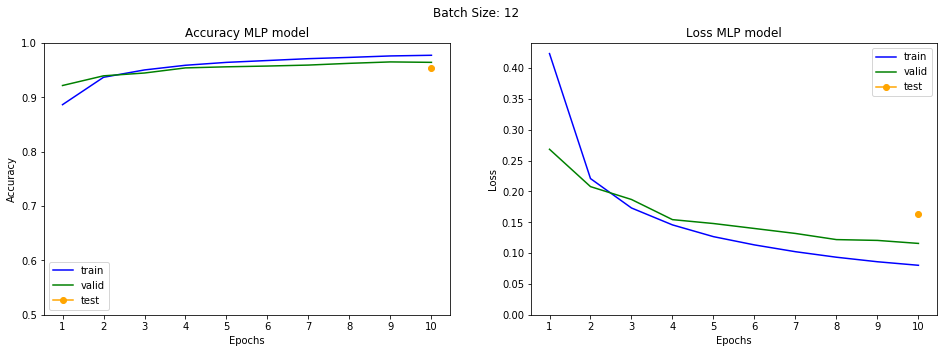

10000/10000 [==============================] - 0s 7us/step


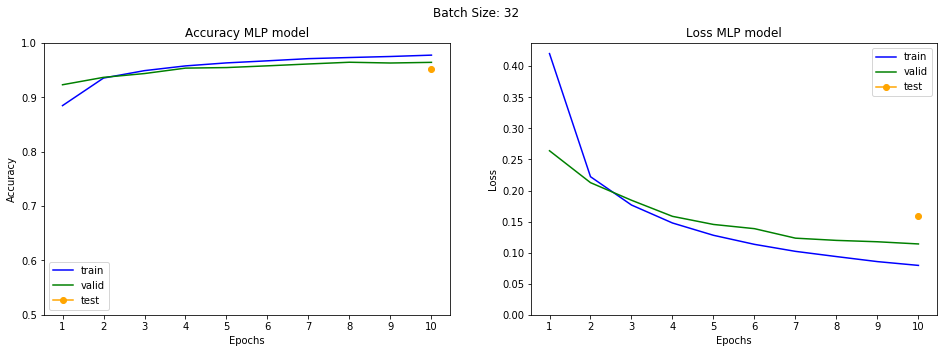

10000/10000 [==============================] - 0s 10us/step


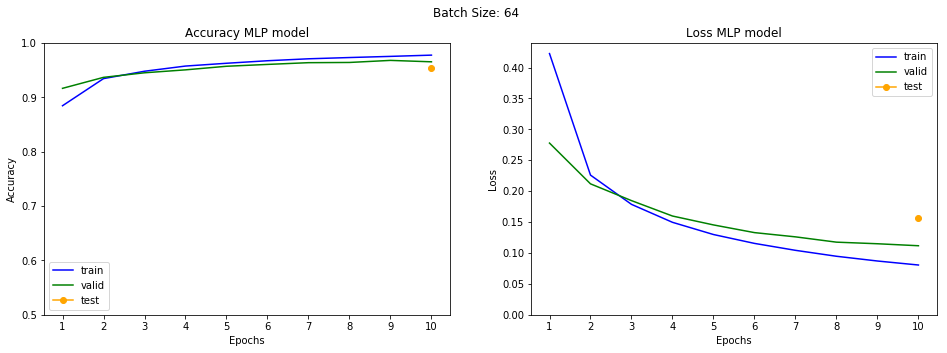

In [65]:
res_plot(history_bs_12, model_bs_12, "Batch Size: 12")
res_plot(history_bs_32, model_bs_32, "Batch Size: 32")
res_plot(history_bs_64, model_bs_64, "Batch Size: 64")

The previous 6 figures show very similar performances. Validation performs better in the first 2 epochs, but is overtaken by the training set after 3 epochs. One reason for the discrepancy in the first 2 epochs could be in how the epoch accuracy and loss are calculated for training and validation set. each epoch trains the network on the entire training set in batches. The accuracy seen in the graph for the training set is average batch performance. This means that the batches in the beginning will have a much lower accuracy and higher loss than later batches in the epoch, which overall results in lower accuracy and loss. The neural network used in this example is quite small and learns relatively quickly, so that we would expect large improvements during the epochs. The validation data on the other hand is only evaluated at the end of each epoch, when the network has trained on the entire training set. After epoch 3 the NN is slightly overfitting, which can be seen in higher accuracy of the training set compared to validation and test set in epoch 10. The Network has almost memorized the entire training set and is starting to become too specific.

---

In a next test I trained three models with different Learning Rates (.5, .05, .005), all other parameters were kept the same (sigmoid activation, no L2, 64 batch_size). The results of the highest and lowest Learning rate, can be seen below. 

10000/10000 [==============================] - 0s 12us/step


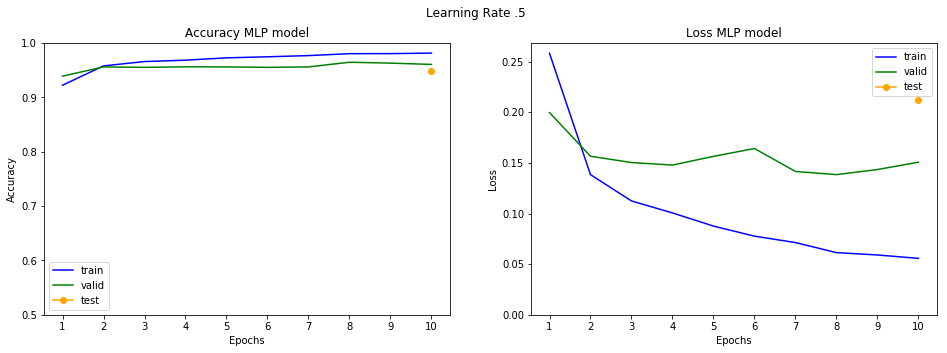

10000/10000 [==============================] - 0s 10us/step


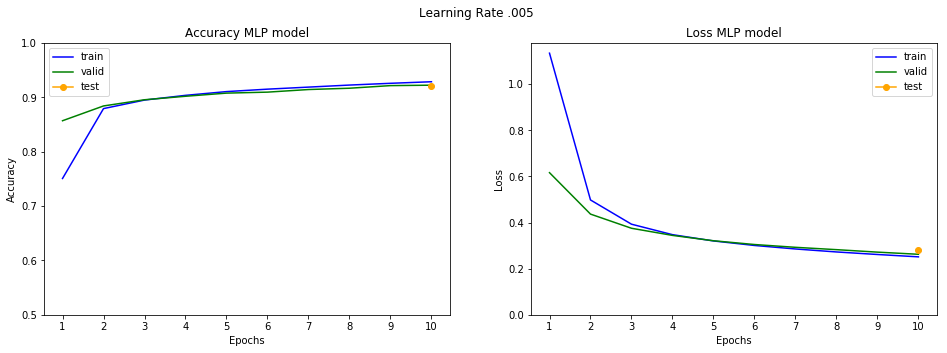

In [68]:
res_plot(history_LR_5, model_LR_5, "Learning Rate .5")
res_plot(history_LR_005, model_LR_005, "Learning Rate .005")

The model with the highest Learning rate achieves quite high performance early and starts to overfit soon after (starting in epoch 3). The overfitting can be seen more clearly seen in the Loss graph at LR 0.5. the loss curves for training and validation set diverge, indicating that the model is memorizing the training set more and more, while performance on the validation set does not improve in the same way. With a very low LR on the other hand, the model learns quite slowly, but the accuracy and loss of the training and validation set follow each other more closely. 

---

In a last test I look at the effect of L2 regularization (.1, .01, .001) on two activation functions (sigmoid and relu). The remaining parameters are kept at default (batch size: 64, LR: 0.01).

10000/10000 [==============================] - 0s 12us/step


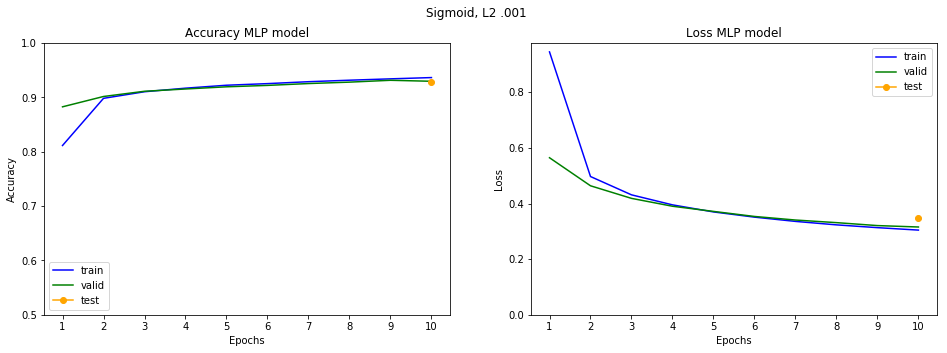

10000/10000 [==============================] - 0s 10us/step


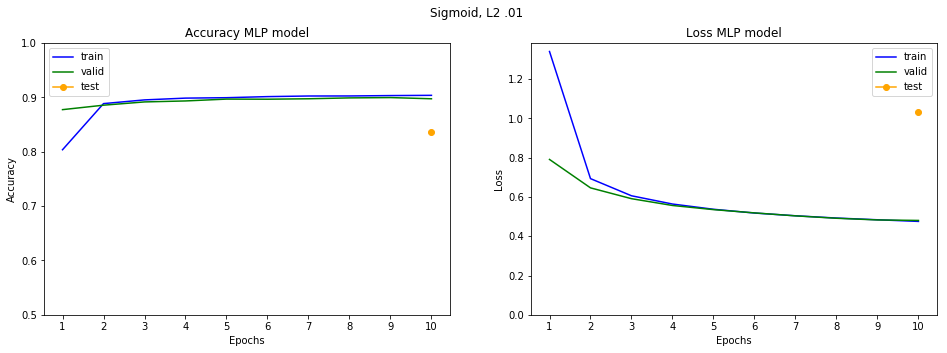

10000/10000 [==============================] - 0s 10us/step


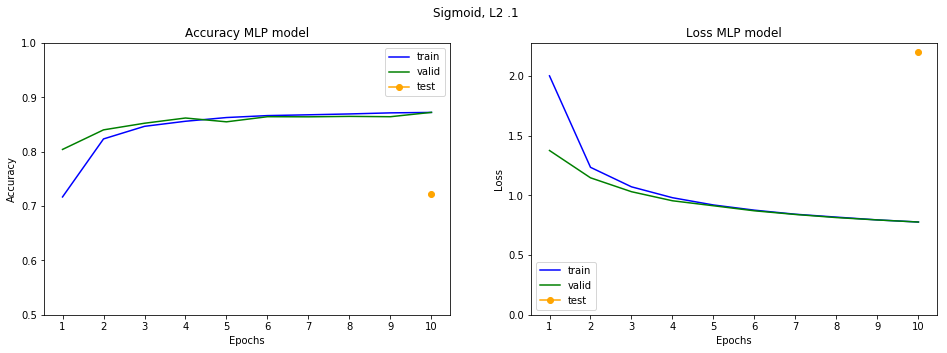

10000/10000 [==============================] - 0s 11us/step


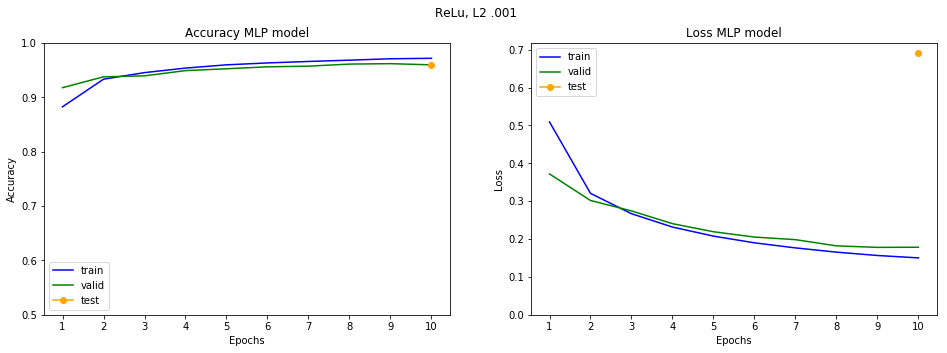

10000/10000 [==============================] - 0s 9us/step


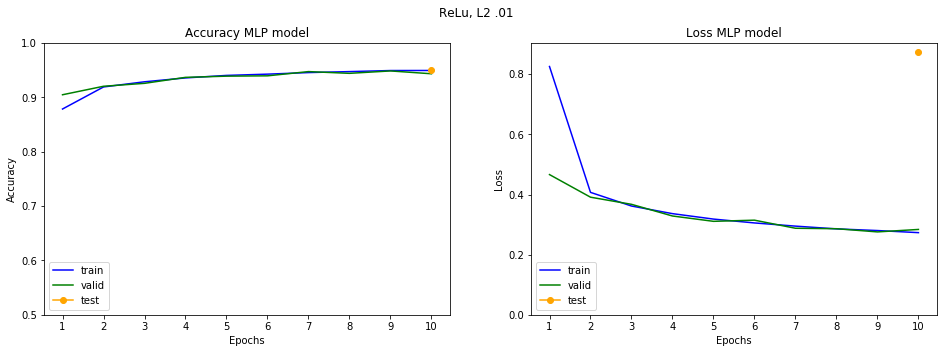

10000/10000 [==============================] - 0s 11us/step


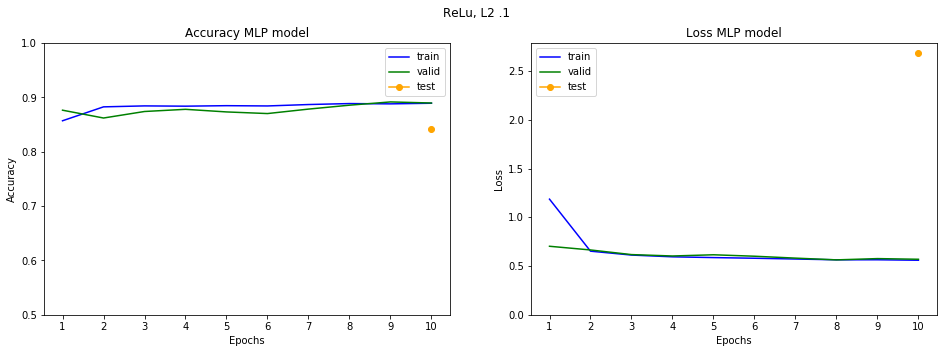

In [70]:
res_plot(history_sig_001, model_sig_001, "Sigmoid, L2 .001")
res_plot(history_sig_01, model_sig_01, "Sigmoid, L2 .01")
res_plot(history_sig_1, model_sig_1, "Sigmoid, L2 .1")
res_plot(history_rel_001, model_rel_001, "ReLu, L2 .001")
res_plot(history_rel_01, model_rel_01, "ReLu, L2 .01")
res_plot(history_rel_1, model_rel_1, "ReLu, L2 .1")

Overall we can see that increasing L2 regularization will increase the loss, independent of the other parameters for both activation functions. Another effect we can observe is, that we see almost no signs of overfitting. the accuracy and loss curves for training and validation set follow each other closely. This is the effect of the L2 regularization, which "punishes" the weights for being too large. Larger L2 means harder penalty. This prevents the weights of any feature to become too large and prevents some degree of memorization on the networks part. The downside is if L2 is too aggressive, it will prevent learning progress. We can see this in declining overall accuracy with increasing L2 term. The sigmoid models go from ~94% acc at L2: 0.001 to under ~87% acc at L2: 0.1, while the Relu models go from ~97% acc at L2 0.001 to ~90% acc at L2 0.1. The accuracy of the test set decreases as well with increasing L2. Especially the sigmoid models performance on the training set plummets with increasing L2 from ~94% par with training to ~70% at L2 0.1. There is one potential explanation for this. Using large L2 values (0.1 or 0.01) limits the weights closer around 0, in turn the sigmoid activation function is limited to the section around the intercept where the sigmoid is close to linear (see figure below).

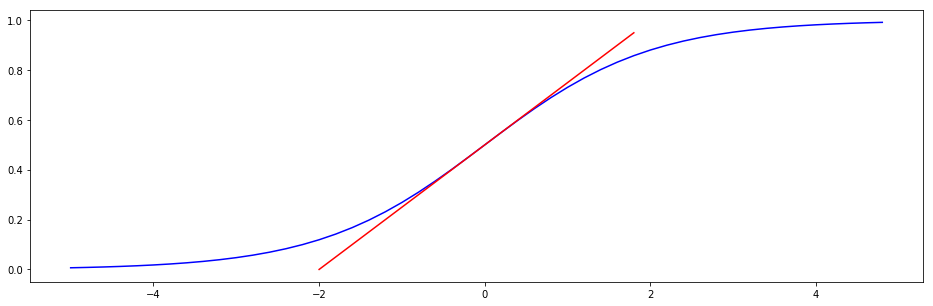

In [90]:
pl_sigmoid()

Limiting the sigmoid to values close to 0 effectively results in a close to linear transformation, which makes the entire neural network close to linear. Due to the number of neurons the network is able to memorize the training set, but performs much worse on the test set. The relu activation does not have this problem, since it is nonlinear close to 0. For x < 0; y(x) = 0 and x > 0; y(x) = x. 

These preliminary tests revealed some usefull hyper parameters for further training.
- a batch size of 64
- L2 of 0.001
- LR of 0.01
- Relu activation function
I take these hyperparameters to train a deeper network which was specifically built for this task: Lenet 5.

## Lenet Architecture

Lenet 5 was developed by Yann LeCunn and was published in LeCun et al. 1998 [1]. It is one of the first Convolutional Neural Networks. I follow the architecture as mentioned in the paper, but change the activation functions for relu instead of the default tanh. 

In [92]:
Lenet_rel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 6, 28, 28)         156       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 6, 14, 14)         0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 16, 10, 10)        2416      
_________________________________________________________________
Pool2 (MaxPooling2D)         (None, 16, 5, 5)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 120, 1, 1)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 84)                10164     
__________

Lenet 5 has 3 Convolutional layers and two Pooling layers which reduce the dimensions of the image from 28 x 28 to 1 x 1, but increase the depth, by adding convolutional feature maps (6 feature maps in Conv1 to 120 maps after Conv3). After Convolutions the next layer is a familiar Dense layer where 120 outputs from the convolutions are connected to 84 units of the hidden layer. The last layer is an out layer with Softmax activation. 

I trained Lenet-5 for 10 epochs the results of the performance can be seen below in this figure.

10000/10000 [==============================] - 6s 556us/step


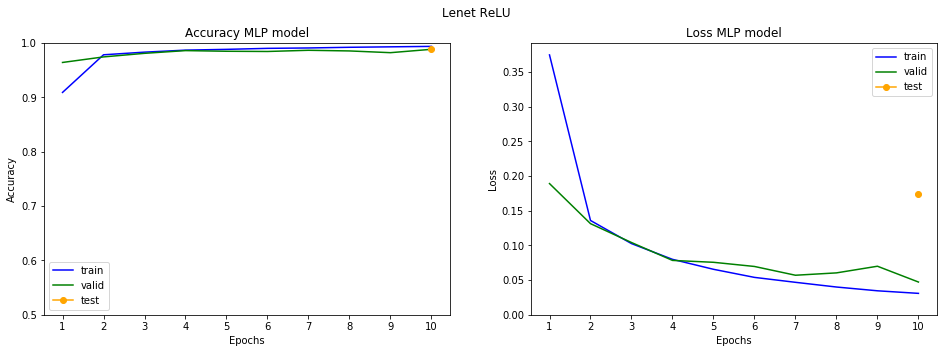

In [98]:
res_plot(Lenet_hist, Lenet_rel, "Lenet ReLU")

Looking closer we can plot a confusion matrix with detailed results of the classification performed by the neural network

In [128]:
Lenet_conf, Lenet_eval, Lenet_pred = predict(Lenet_rel, x_test, y_test)
print("Accuracy :", Lenet_eval[1], "Loss :", Lenet_eval[0])
Lenet_conf

Accuracy : 0.9898 Loss : 0.17405149820744992


Predicted,0,1,2,3,4,5,6,7,8,9,All
Actual,,,,,,,,,,,
0,978,0,0,1,0,0,1,0,0,0,980
1,0,1132,0,1,0,1,1,0,0,0,1135
2,0,3,1018,0,1,0,1,5,4,0,1032
3,1,0,0,1003,0,3,0,0,3,0,1010
4,0,0,1,0,975,0,5,0,1,0,982
5,2,0,0,4,0,882,1,0,2,1,892
6,1,2,0,0,1,2,952,0,0,0,958
7,0,5,2,3,2,0,0,1016,0,0,1028
8,1,1,1,2,1,1,2,0,961,4,974


The overall accuracy on the test set is 98.9 %. We see some misidentifications, images of 2s 7s and 9s seem to give the most problems. There we see the highest falsely identified images.

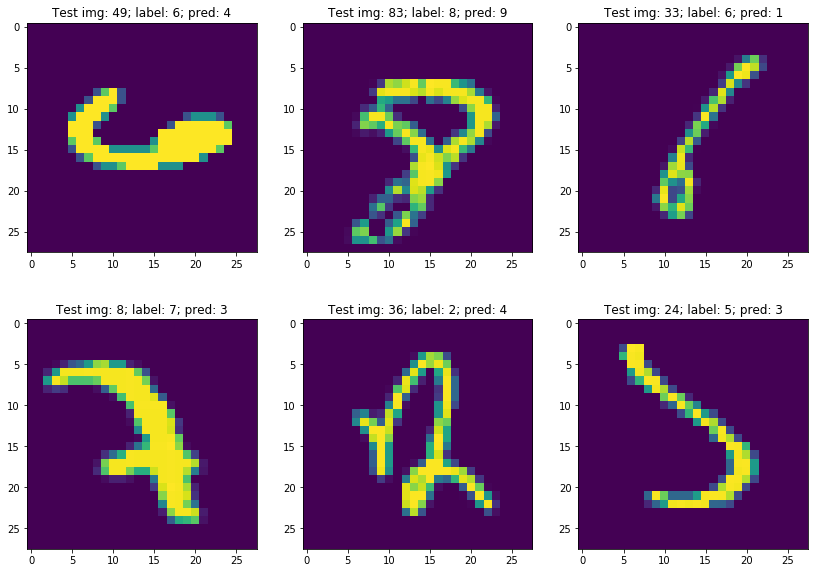

In [124]:
plot_false_pred()

Here we see some of these misidentified images. We see that some are quite distorted. The last image for example, a 5, is hard to make out even from just looking at it.

## Discussion of Process

Overall the training worked well. In the beginning I was trying to automize the hyperparamter search using the talos package, but unfortunately, I ran into complications and had to do it manually. The different iterations of the single layer NN showed some patterns, but were not as clear as I expected. The batch size for example did not show a large effect at all. I expected it to have a bigger impact than it ended up having. Nevertheless it gave me some idea of what settings to try with the Lenet NN. 
I would like to try to increase the training time the next time I fit a neural network. For the purposes of this exrecise I limited the epochs to 10, but considering the results I don't expect a massive increase in performance.

[1] LeCun, Y., Bottou, L., Bengio, Y., Haffner, P. (1998). "Gradient-Based Learning Applied to Document Recognition." Proceedings of the IEEE. 86(11).

### Code

What follows are Code Chunks that were used to do the calculations. Run in sequence they will give the results needed for the above figures/classification results. I saved a copy of the Lenet model to re-load the model without saving (Lenet.json; weights_Lenet_rel.hdf5). 

The original Jupyter notebook and a copy of this report can be found on my github:
https://github.com/FM-uib/INF368

The instance I used to run the code is:
instance-florian-muthreich

I made use of the keras documentation to write this notebook. 

https://keras.io/

---

Loading necessary packages

In [1]:
import matplotlib.pyplot as plt
import keras
import random
import numpy as np

Using TensorFlow backend.


Next I download the MNIST dataset. It is already split in test and training set and saved to variables. The images are stored separately from the labels in arrays.

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

The MNIST set has been downloaded and I can show the dimensions of the dataset.
In total there are 70000 images of handwritten numbers. 60000 in the train set and 10000 in the test set. each image is 28 x 28 pixels and has only one channel, which means each cell indicates the intensity of a pixel. The labels are stored separately in their own array, which basically has the shape of a vector.

In [3]:
print("Training set:",x_train.shape, ", labels", y_train.shape)
print("Test set:",x_test.shape, ", labels", y_test.shape)

Training set: (60000, 28, 28) , labels (60000,)
Test set: (10000, 28, 28) , labels (10000,)


Function to resize dataset into 4D vectors, needed for Lenet.

In [3]:
def res_rec(data, labels, channels):
    tmp = data.reshape(data.shape[0], channels, data.shape[1], data.shape[2])
    tmp = tmp.astype("float32")
    tmp = tmp/np.amax(x_train)
    lbl = keras.utils.to_categorical(labels, len(np.unique(labels)))
    return tmp, lbl

x_train, y_train = res_rec(x_train, y_train, 1)
x_test, y_test = res_rec(x_test, y_test, 1)

print("Training set:",x_train.shape, ", labels", y_train.shape)
print("Test set:",x_test.shape, ", labels", y_test.shape)

Training set: (60000, 1, 28, 28) , labels (60000, 10)
Test set: (10000, 1, 28, 28) , labels (10000, 10)


Next Code Chunk splits the train set into train and validation set. 

In [4]:
ind = random.sample(range(x_train.shape[0]), int(1/12 * x_train.shape[0]))
x_valid, y_valid = x_train[ind], y_train[ind]
x_train, y_train = np.delete(x_train, ind, axis = 0), np.delete(y_train, ind, axis = 0)

Function to plot a sigmoid activation:

In [89]:
def pl_sigmoid():
    import math
    def sigmoid(x):
        a = []
        for item in x:
            a.append(1/(1+math.exp(-item)))
        return a
    x = np.arange(-5., 5., 0.2)
    sig = sigmoid(x)
    plt.plot(x,sig, color = "blue")
    plt.plot(np.arange(-2., 2., 0.2),np.arange(0., 1., 0.05), color = "red")
    plt.show()

Function, which prints 6 random MNIST images:

In [28]:
def random_MNIST_images():
    (x_tr, y_tr), (x_te, y_te) = mnist.load_data()
    plt.rcParams["figure.figsize"] = (14,10)
    for x in range(6):
        if x<3:
            i = random.randint(1,x_tr.shape[0])
            plt.subplot(2, 3, x+1)
            plt.imshow(x_tr[i])
            plt.title("Train img: {}; label: {}".format(i,y_tr[i]))
        else:
            i = random.randint(1,x_te.shape[0])
            plt.subplot(2, 3, x+1)
            plt.imshow(x_te[i])
            plt.title("Test img: {}; label: {}".format(i,y_te[i]))
    plt.show()

Function plotting accuracy and loss of a trained neural network:

In [35]:
def res_plot(trained, model, title):
    tested_eval = model.evaluate(x_test, y_test, batch_size = 128)
    plt.rcParams["figure.figsize"] = (16,5)
    plt.subplot(1, 2, 1)

    plt.plot(range(1, 11), trained.history["acc"], color = "blue")
    plt.plot(range(1, 11), trained.history["val_acc"], color = "green")
    plt.plot(10, tested_eval[1], marker = "o", color = "orange")
    plt.ylim(0.5, 1), plt.xticks(range(1,11))
    plt.legend(["train", "valid", "test"])
    plt.title("Accuracy MLP model"), plt.xlabel("Epochs"), plt.ylabel("Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(range(1, 11), trained.history["loss"], color = "blue")
    plt.plot(range(1, 11), trained.history["val_loss"], color = "green")
    plt.plot(10, tested_eval[0], marker = "o", color = "orange")
    plt.ylim(0), plt.xticks(range(1,11))
    plt.legend(["train", "valid", "test"])
    plt.title("Loss MLP model"), plt.xlabel("Epochs"), plt.ylabel("Loss")
    plt.suptitle(title)
    plt.show()

Function to train a simple single hidden layer neural network:

In [32]:
def simple_NN(x_train, y_train, x_valid, y_valid, L2 = 0.001, activation = "relu", LR = 0.01, batch_size = 64):
    from keras import optimizers
    model = Sequential([
        Flatten(input_shape = (1,28, 28), name = "flatten"),
        Dense(50, name = "hidden_1", kernel_regularizer=regularizers.l2(L2),),
        Activation(activation, name = "act_hidden_1"),
        Dense(10, name = "out"),
        Activation("softmax", name = "act_out")
    ])
    sgd = optimizers.SGD(lr=LR, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer = sgd,
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
    checkpoints = keras.callbacks.ModelCheckpoint("./checkpoints/model_{epoch:02d}.hdf5", 
                                              monitor='val_loss', 
                                              verbose=0, 
                                              save_best_only=False, save_weights_only=False)
    history = model.fit(x_train, y_train, 
                    epochs = 10, batch_size = batch_size, 
                    callbacks = [checkpoints], 
                    validation_data = (x_valid, y_valid))
    return model, history

Function to train Lenet 5:

In [95]:
def train_Lenet(x_train, y_train, x_valid, y_valid, L2 = 0.001, activation = "relu", LR = 0.01):
    from keras import optimizers
    from keras.models import Sequential
    from keras.layers import Dense, Activation, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    from keras import regularizers
    Lenet = Sequential([
        Conv2D(input_shape = (1,28, 28), filters = 6, kernel_size = 5, strides = 1, activation = activation, name = "Conv1", padding = "same", data_format = "channels_first"),
        MaxPooling2D(pool_size = 2, name = "Pool1", data_format = "channels_first"),
        Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = activation, name = "Conv2", data_format = "channels_first"),
        MaxPooling2D(pool_size = 2, name = "Pool2", data_format = "channels_first"),
        Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = activation, name = "Conv3",data_format = "channels_first"),
        Flatten(name = "flatten"),
        Dense(84, name = "hidden_2", activation = activation, kernel_regularizer=regularizers.l2(L2)),
        Dense(10, name = "out", activation = "softmax")
    ])

    sgd = optimizers.SGD(lr=LR, decay=1e-6, momentum=0.9, nesterov=True)
    Lenet.compile(optimizer = sgd,
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
    checkpoints = keras.callbacks.ModelCheckpoint("./checkpoints/Lenet_{epoch:02d}.hdf5", 
                                              monitor='val_loss', 
                                              verbose=0, 
                                              save_best_only=False, save_weights_only=False)
    history = Lenet.fit(x_train, y_train, 
                    epochs = 10, batch_size = 64, 
                    callbacks = [checkpoints], 
                    validation_data = (x_valid, y_valid))
    return Lenet, history


Function to evaluate and predict the trained NN on the test set. Returns a confusionmatrix.

In [104]:
def predict(model, x, y):
    import pandas as pd
    model_eval = model.evaluate(x, y, batch_size = 128)
    model_pred = model.predict(x, batch_size = 128)

    test_actu = np.argmax(y, axis = 1, out = None)
    test_pred = np.argmax(model_pred, axis = 1, out = None)

    confusion = pd.crosstab(test_actu, test_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    return confusion, model_eval, model_pred

Function to plot random misidentified images:

In [ ]:
def plot_false_pred(y_test = y_test, pred = Lenet_pred):
    te_actu = np.argmax(y_test, axis = 1, out = None)
    te_pred = np.argmax(pred, axis = 1, out = None)

    t = te_actu == te_pred
    t = np.invert(t)
    from itertools import compress
    t = list(compress(range(len(t)), t))
    (x_tr, y_tr), (x_te, y_te) = mnist.load_data()
    plt.rcParams["figure.figsize"] = (14,10)
    for x in range(6):
        i = random.randint(1,len(t))
        plt.subplot(2, 3, x+1)
        plt.imshow(x_te[t[i]])
        plt.title("Test img: {}; label: {}; pred: {}".format(i,y_te[t[i]], te_pred[t[i]]))
    plt.show()

### Training the Neural nets 

These following chunks will train the single layer neural nets and Lenet. 

In [33]:
model_bs_12, history_bs_12 = simple_NN(x_train, y_train, x_valid, y_valid, batch_size = 12, L2 = 0, activation = "sigmoid")
model_bs_32, history_bs_32 = simple_NN(x_train, y_train, x_valid, y_valid, batch_size = 12, L2 = 0, activation = "sigmoid")
model_bs_64, history_bs_64 = simple_NN(x_train, y_train, x_valid, y_valid, batch_size = 12, L2 = 0, activation = "sigmoid")

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 80us/step - loss: 0.4237 - acc: 0.8866 - val_loss: 0.2685 - val_acc: 0.9218
Epoch 2/10
55000/55000 [==============================] - 4s 75us/step - loss: 0.2209 - acc: 0.9369 - val_loss: 0.2079 - val_acc: 0.9396
Epoch 3/10
55000/55000 [==============================] - 4s 77us/step - loss: 0.1732 - acc: 0.9505 - val_loss: 0.1870 - val_acc: 0.9448
Epoch 4/10
55000/55000 [==============================] - 4s 76us/step - loss: 0.1458 - acc: 0.9591 - val_loss: 0.1543 - val_acc: 0.9542
Epoch 5/10
55000/55000 [==============================] - 4s 78us/step - loss: 0.1267 - acc: 0.9644 - val_loss: 0.1480 - val_acc: 0.9562
Epoch 6/10
55000/55000 [==============================] - 4s 77us/step - loss: 0.1134 - acc: 0.9678 - val_loss: 0.1400 - val_acc: 0.9576
Epoch 7/10
55000/55000 [==============================] - 4s 77us/step - loss: 0.1023 - acc: 0.9712 - val_loss: 0.1319 - val_acc:

In [66]:
model_LR_005, history_LR_005 = simple_NN(x_train, y_train, x_valid, y_valid, LR = 0.005, activation = "sigmoid", L2 = 0)
model_LR_05, history_LR_05 = simple_NN(x_train, y_train, x_valid, y_valid, LR = 0.05, activation = "sigmoid", L2 = 0)
model_LR_5, history_LR_5 = simple_NN(x_train, y_train, x_valid, y_valid, LR = 0.5, activation = "sigmoid", L2 = 0)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 1s 27us/step - loss: 1.1345 - acc: 0.7507 - val_loss: 0.6164 - val_acc: 0.8570
Epoch 2/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.4981 - acc: 0.8793 - val_loss: 0.4367 - val_acc: 0.8842
Epoch 3/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.3929 - acc: 0.8950 - val_loss: 0.3753 - val_acc: 0.8956
Epoch 4/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.3475 - acc: 0.9037 - val_loss: 0.3443 - val_acc: 0.9020
Epoch 5/10
55000/55000 [==============================] - 1s 22us/step - loss: 0.3202 - acc: 0.9106 - val_loss: 0.3211 - val_acc: 0.9078
Epoch 6/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.3007 - acc: 0.9151 - val_loss: 0.3048 - val_acc: 0.9096
Epoch 7/10
55000/55000 [==============================] - 1s 22us/step - loss: 0.2855 - acc: 0.9189 - val_loss: 0.2927 - val_acc:

In [69]:
model_sig_001, history_sig_001 = simple_NN(x_train, y_train, x_valid, y_valid, L2 = 0.001, activation = "sigmoid")
model_sig_01, history_sig_01 = simple_NN(x_train, y_train, x_valid, y_valid, L2 = 0.01, activation = "sigmoid")
model_sig_1, history_sig_1 = simple_NN(x_train, y_train, x_valid, y_valid, L2 = 0.1, activation = "sigmoid")
model_rel_001, history_rel_001 = simple_NN(x_train, y_train, x_valid, y_valid, L2 = 0.001, activation = "relu")
model_rel_01, history_rel_01 = simple_NN(x_train, y_train, x_valid, y_valid, L2 = 0.01, activation = "relu")
model_rel_1, history_rel_1 = simple_NN(x_train, y_train, x_valid, y_valid, L2 = 0.1, activation = "relu")

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 2s 28us/step - loss: 0.9449 - acc: 0.8114 - val_loss: 0.5645 - val_acc: 0.8826
Epoch 2/10
55000/55000 [==============================] - 1s 24us/step - loss: 0.4970 - acc: 0.8982 - val_loss: 0.4638 - val_acc: 0.9016
Epoch 3/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.4312 - acc: 0.9103 - val_loss: 0.4185 - val_acc: 0.9112
Epoch 4/10
55000/55000 [==============================] - 1s 24us/step - loss: 0.3952 - acc: 0.9169 - val_loss: 0.3902 - val_acc: 0.9154
Epoch 5/10
55000/55000 [==============================] - 1s 22us/step - loss: 0.3697 - acc: 0.9223 - val_loss: 0.3717 - val_acc: 0.9194
Epoch 6/10
55000/55000 [==============================] - 1s 23us/step - loss: 0.3510 - acc: 0.9253 - val_loss: 0.3535 - val_acc: 0.9220
Epoch 7/10
55000/55000 [==============================] - 1s 24us/step - loss: 0.3357 - acc: 0.9288 - val_loss: 0.3406 - val_acc:

In [96]:
Lenet_rel, Lenet_hist = train_Lenet(x_train, y_train, x_valid, y_valid)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 59s 1ms/step - loss: 0.3748 - acc: 0.9091 - val_loss: 0.1893 - val_acc: 0.9642
Epoch 2/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.1361 - acc: 0.9783 - val_loss: 0.1315 - val_acc: 0.9744
Epoch 3/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.1027 - acc: 0.9832 - val_loss: 0.1043 - val_acc: 0.9810
Epoch 4/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.0800 - acc: 0.9869 - val_loss: 0.0784 - val_acc: 0.9860
Epoch 5/10
55000/55000 [==============================] - 57s 1ms/step - loss: 0.0656 - acc: 0.9883 - val_loss: 0.0757 - val_acc: 0.9848
Epoch 6/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.0540 - acc: 0.9901 - val_loss: 0.0697 - val_acc: 0.9844
Epoch 7/10
55000/55000 [==============================] - 58s 1ms/step - loss: 0.0469 - acc: 0.9909 - val_loss: 0.0571 - val_acc:

In [125]:
json_string = Lenet_rel.to_json()
with open("Lenet.json", "w") as json_file:
    json_file.write(json_string)

Lenet_rel.save_weights("weights_Lenet_rel.hdf5")

Load model from json and reload the weights. 

In [ ]:
with open("Lenet.json", "r") as json_file:
    load_json_model = json_file.read()
    
loaded_model = keras.models.model_from_json(load_json_model)
loaded_model.load_weights("weights_Lenet_rel.hdf5", by_name=False)

This code snippet will load the model after the n training epoch and restore the weights 

In [ ]:
new_model = keras.models.load_model("checkpoints/Lenet_10.hdf5")
new_model.summary()
new_model.evaluate(x_train, y_train, batch_size = 128)